In [65]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import plotly.figure_factory as ff

In [31]:
def abs_diff_norm(df, ord=np.inf):
    return pd.Series(np.linalg.norm(df.diff().abs().to_numpy(),
               ord=ord,
               axis=1, #row-wise
               ))

In [56]:
from typing import Any


class MyZscores():
    def __init__(self, mean, std) -> None:
        self.mean = mean
        self.std = std

    def __call__(self, data) -> Any:
        return (data - self.mean)/self.std

##### Baseline Stats

In [2]:
df_baseline = pd.read_csv('baseline_obs.csv',
                          index_col=0)

In [47]:
bline_norms = abs_diff_norm(df_baseline)

In [48]:
bline_norms.describe()

count    8758.000000
mean        0.422525
std         0.289300
min         0.103553
25%         0.193447
50%         0.311111
75%         0.600210
max         0.969697
dtype: float64

Shapiro is not reccomeneded because it's sensitive to outliers, but it's sure this data is normal so I think we're good

In [34]:
shapiro(bline_norms)

c:\Users\Broda-Milian\anaconda3\envs\CityLearnART\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [57]:
score = MyZscores(bline_norms.mean(), bline_norms.std())

In [58]:
baseline_norm_z = score(bline_norms)
baseline_norm_z.describe()

count    8.758000e+03
mean     2.596183e-17
std      1.000000e+00
min     -1.102563e+00
25%     -7.918364e-01
50%     -3.851154e-01
75%      6.141875e-01
max      1.891362e+00
dtype: float64

##### ACG  Untargeted Stats

In [61]:
df_acg = pd.read_csv('adv_perturbed_obs.csv',
                          index_col=0)

In [62]:
acg_norms = abs_diff_norm(df_acg)

In [63]:
acg_norms.describe()

count    8758.000000
mean        0.427689
std         0.286631
min         0.082556
25%         0.205276
50%         0.318826
75%         0.614662
max         1.051687
dtype: float64

In [64]:
acg_norm_z = score(acg_norms)
acg_norm_z.describe()

count    8758.000000
mean        0.017851
std         0.990774
min        -1.175141
25%        -0.750946
50%        -0.358449
75%         0.664144
max         2.174769
dtype: float64

##### Optimal MyBB stats 

In [79]:
df_optimal_mybb = df_acg = pd.read_csv('Optimal myBB adv obs.csv',
                          header=None)

In [81]:
opt_bb_norms = abs_diff_norm(df_optimal_mybb)

In [82]:
opt_bb_norms.describe()

count    8758.000000
mean        0.611071
std         0.118913
min         0.222938
25%         0.528422
50%         0.602320
75%         0.679754
max         1.000000
dtype: float64

Z scores from baseline distribution

In [83]:
mybb_norms_z = score(opt_bb_norms)
mybb_norms_z.describe()

count    8758.000000
mean        0.651731
std         0.411037
min        -0.689896
25%         0.366045
50%         0.621481
75%         0.889141
max         1.996108
dtype: float64

##### Baseline-Optimal Comparison

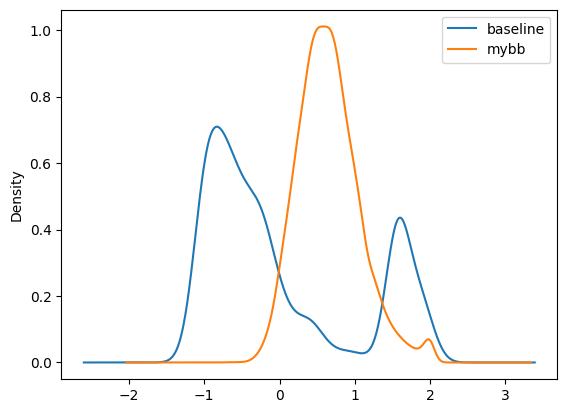

In [84]:
pd.concat([baseline_norm_z,mybb_norms_z], axis='columns').plot.kde().legend(['baseline','mybb'])

In [85]:
ff.create_distplot([baseline_norm_z.dropna(),mybb_norms_z.dropna()],
                   ['baseline','mybb'],
                   bin_size=0.025,
                   show_rug=False,
                   ).update_layout(
                       title='Baseline-Attack Z Scores',
                       xaxis=dict(nticks=40),
                       )

In [86]:
ff.create_distplot([bline_norms.dropna(),opt_bb_norms.dropna()],
                   ['baseline','mybb'],
                   bin_size=0.025,
                   show_rug=False,
                   ).update_layout(
                       xaxis=dict(nticks=40),
                       )